In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
data_path = '/content/gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/'
!ls gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur

haarcascade_eye.xml  haarcascade_frontalface_default.xml


In [13]:
###Eye cascade xml File
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml -P /content/gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/
###Frontal cascade xml File
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P /content/gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/

!ls gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/

--2021-01-31 09:09:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘/content/gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/haarcascade_eye.xml.1’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.05s   

2021-01-31 09:09:44 (7.07 MB/s) - ‘/content/gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/haarcascade_eye.xml.1’ saved [341406/341406]

--2021-01-31 09:09:44--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.13

In [12]:
!ls gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/

haarcascade_eye.xml  haarcascade_frontalface_default.xml


# importing module

In [14]:
import cv2
from urllib.request import urlopen
import numpy as np
from google.colab.patches import cv2_imshow

# Loading the cascade

In [ ]:
cascades_path = data_path
# Load the cascade
face_cascade = cv2.CascadeClassifier(cascades_path +'haarcascade_frontalface_default.xml')
# Read the input image
# req = urlopen('https://tvseriesfinale.com/wp-content/uploads/2014/04/siliconvalley03-590x331.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
result_image = img.copy()

In [30]:
!ls /content/gdrive/MyDrive/Colab_Notebooks/proj/data/open_cv_face_blur/

frame143.jpg  frame149.jpg	   haarcascade_frontalface_default.xml
frame144.jpg  haarcascade_eye.xml


In [39]:
# Load the cascade
face_cascade = cv2.CascadeClassifier(cascades_path +'haarcascade_frontalface_default.xml')
# Read the input image
img_path = cascades_path+'frame143.jpg'
with open(img_path, 'rb') as f:
    data = f.read()
arr = np.fromstring(data, dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
result_image = img.copy()
result_image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

# Convert the image to grayscale

In [40]:
#Convert frame to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect the face object using detect multiscale

In [41]:
# Detect faces

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Finally, draw a rectangle around the face and display the result

In [77]:
# 일단 동그라미로 구역 치는 건 포기
# # Iterate over each detected face:
# for (x,y,w,h) in faces:
#     #Draw a rectangle to see the detected face (Debugging Purpose)
#     # cv2.rectangle(img, (x,y), (x+w,y+h),(255, 255, 0),2)
#     x_ = (2*x+w)*1/2
#     y_ = (2*y+h)*1/2
#     l_r = ((w**2+h**2)**1/2)*1/2
#     blue_color = (255,255,255)
#     cv2.circle(img,(x_,y_),50,blue_color)
# # Display the resulting frame
# cv2_imshow(img)

TypeError: ignored

In [61]:
((w**2+h**2)**1/2)*1/2

5100.5

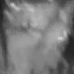

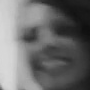

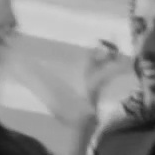

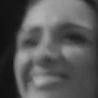

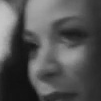

In [51]:
face_crop = []
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face_crop.append(gray[y:y+h, x:x+w])

for face in face_crop:
   cv2_imshow(face)

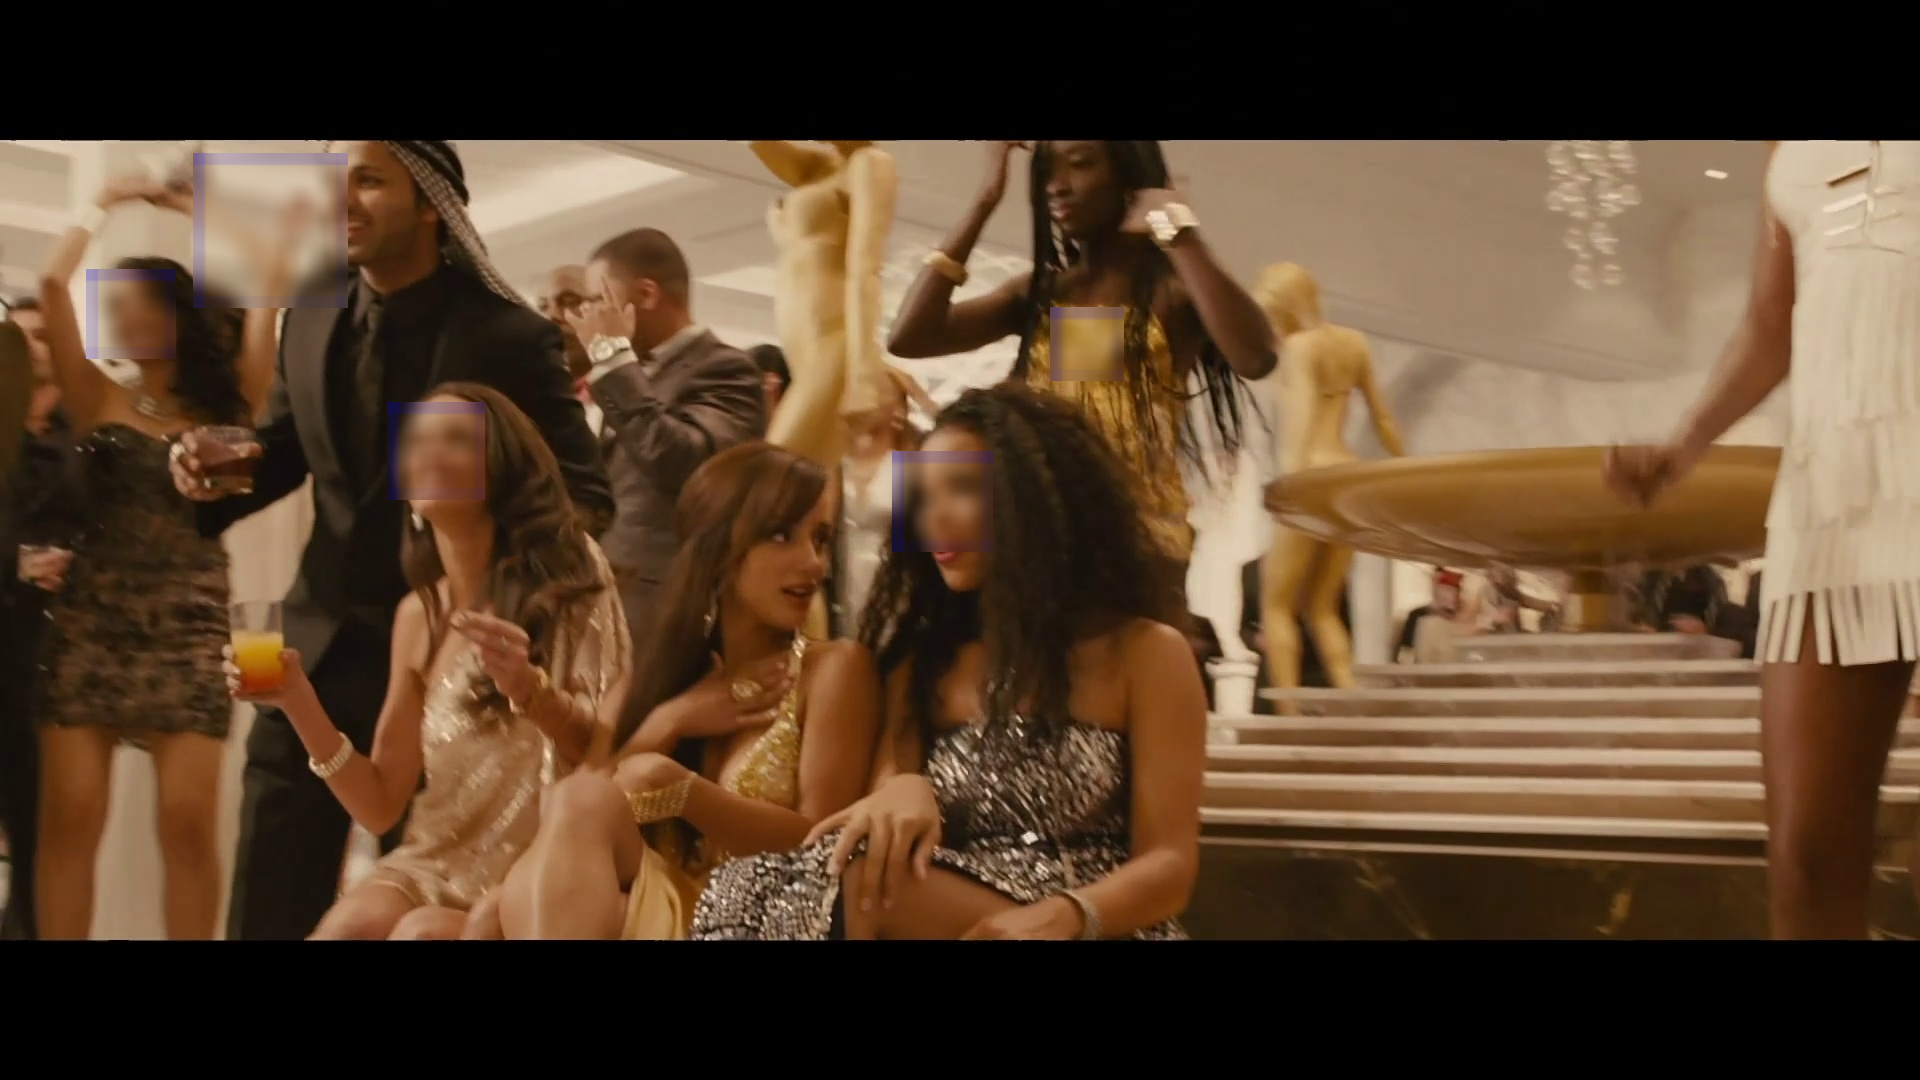

In [59]:
for (x, y, w, h) in faces:
    sub_face = img[y:y+h, x:x+w]
    sub_face = cv2.GaussianBlur(sub_face,(23, 23), 50)
    result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face

cv2_imshow(result_image)